In [1]:
from fastai.vision import *
from fastai.basic_train import _loss_func2activ
from fastai.callbacks import hook_output
import cv2

In [2]:
df = pd.read_csv('dataframe_clean.csv')

In [3]:
df.head()

img_paths   labels  is_valid
0  Clean_dataset/simple_masks/train_00010925.jpg_...     mask     False
1  Clean_dataset/simple_masks/train_00014320.jpg_...     mask     False
2  Clean_dataset/human_body_masks/train_00014611....  no_mask     False
3  Clean_dataset/simple_masks/train_00004266.jpg_...     mask     False
4  Clean_dataset/human_body_masks/train_00019196....  no_mask     False

In [4]:
src = ImageList.from_df(df,path='.',cols='img_paths')

In [5]:
src = src.split_from_df(col='is_valid')

In [6]:
src = src.label_from_df(cols='labels')

In [9]:
size = (360)
bs = 64

In [8]:
tfms=get_transforms(max_rotate=20)

In [12]:
data = src.transform(tfms=tfms,size=size,resize_method=ResizeMethod.PAD,padding_mode='zeros').databunch(bs=bs).normalize(imagenet_stats)

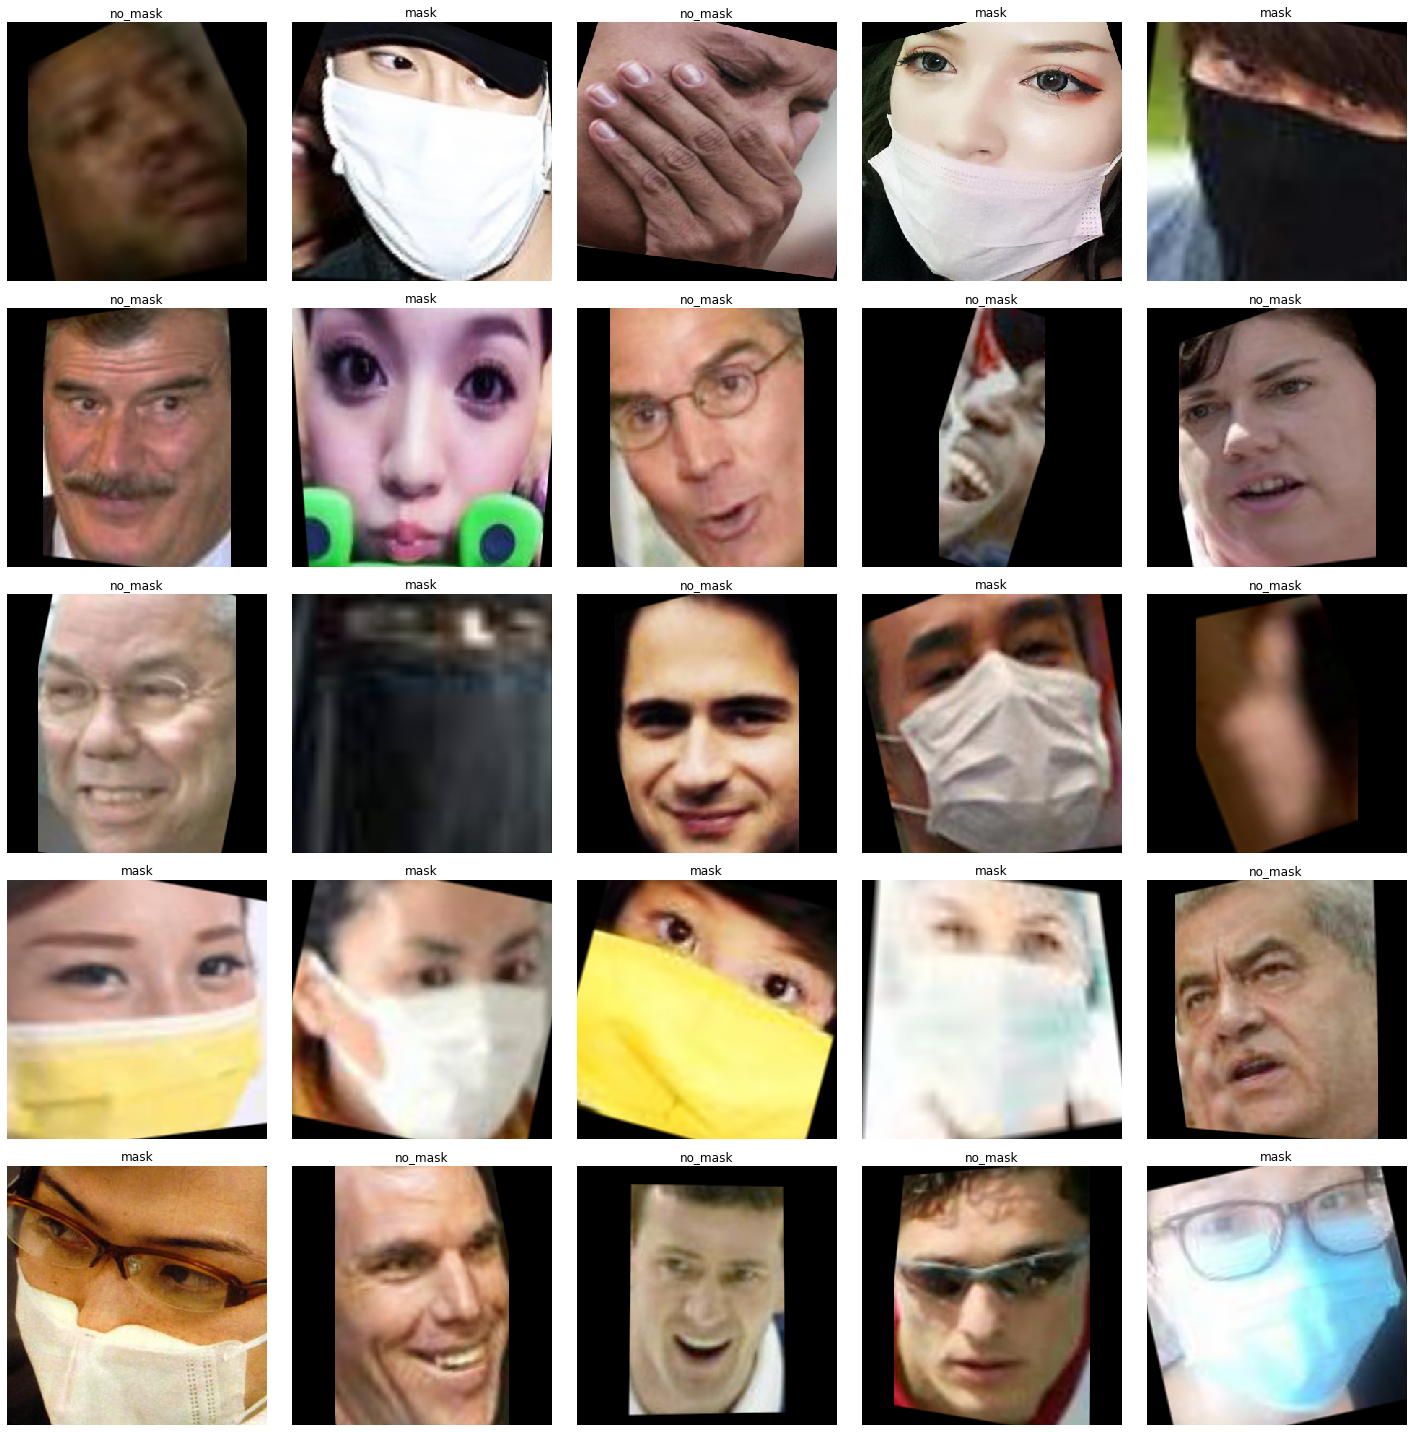

In [13]:
data.show_batch()

In [14]:
data.classes

['mask', 'no_mask']

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


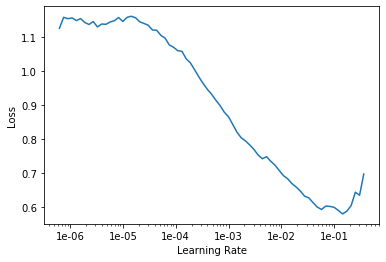

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(10,3e-2)

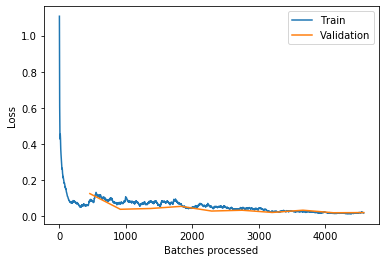

In [19]:
learn.recorder.plot_losses()

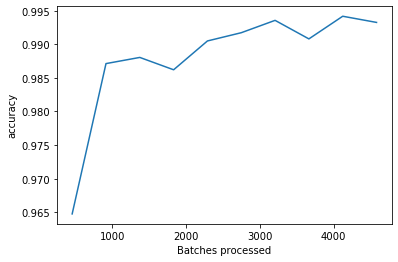

In [20]:
learn.recorder.plot_metrics()

In [21]:
learn.save('res34_sz250_clean_data_aspect_st1')

In [22]:
learn.export('new_model_aspect.pkl')

In [23]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


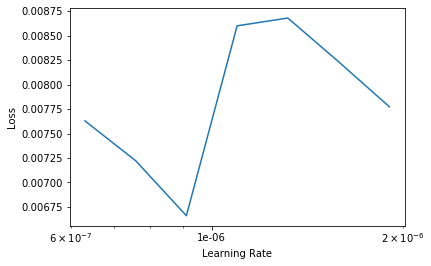

In [30]:
learn.recorder.plot(skip_end=1)

In [31]:
learn.fit_one_cycle(5,slice(8e-8,8e-7))

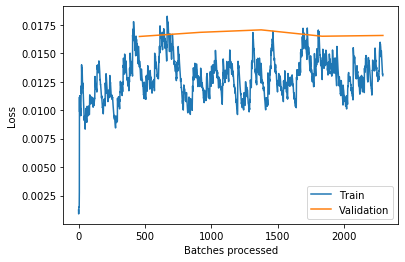

In [32]:
learn.recorder.plot_losses()

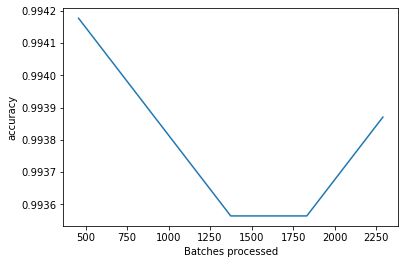

In [33]:
learn.recorder.plot_metrics()

In [34]:
learn.save('res34_sz250_clean_data_aspect_st2')

In [35]:
learn.export('new_model_aspect.pkl')

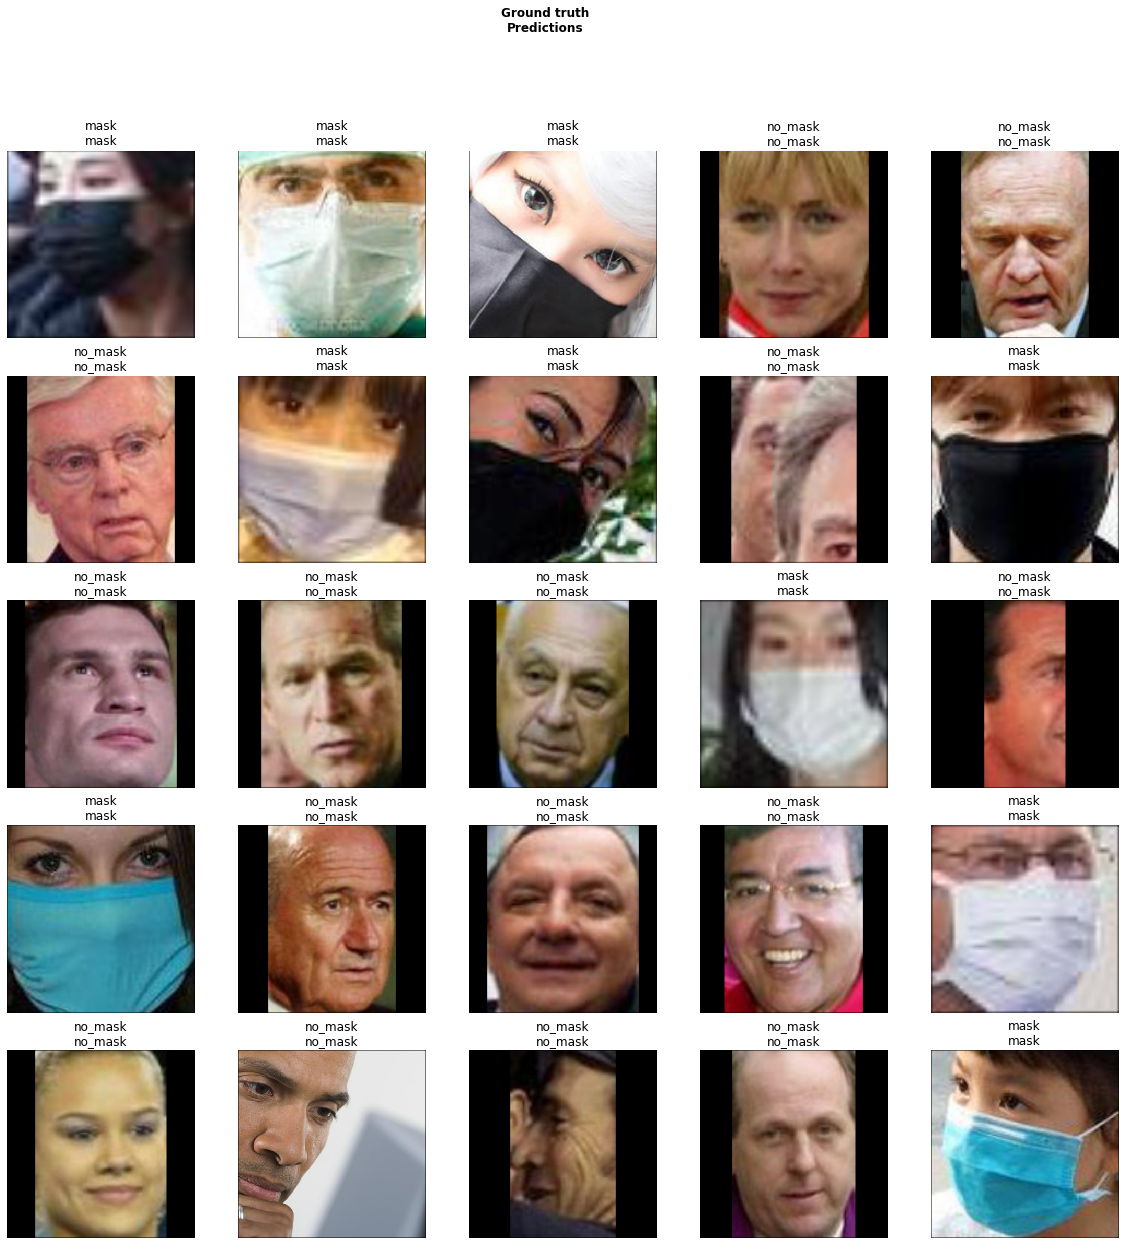

In [36]:
learn.show_results()

In [33]:
interp = learn.interpret()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


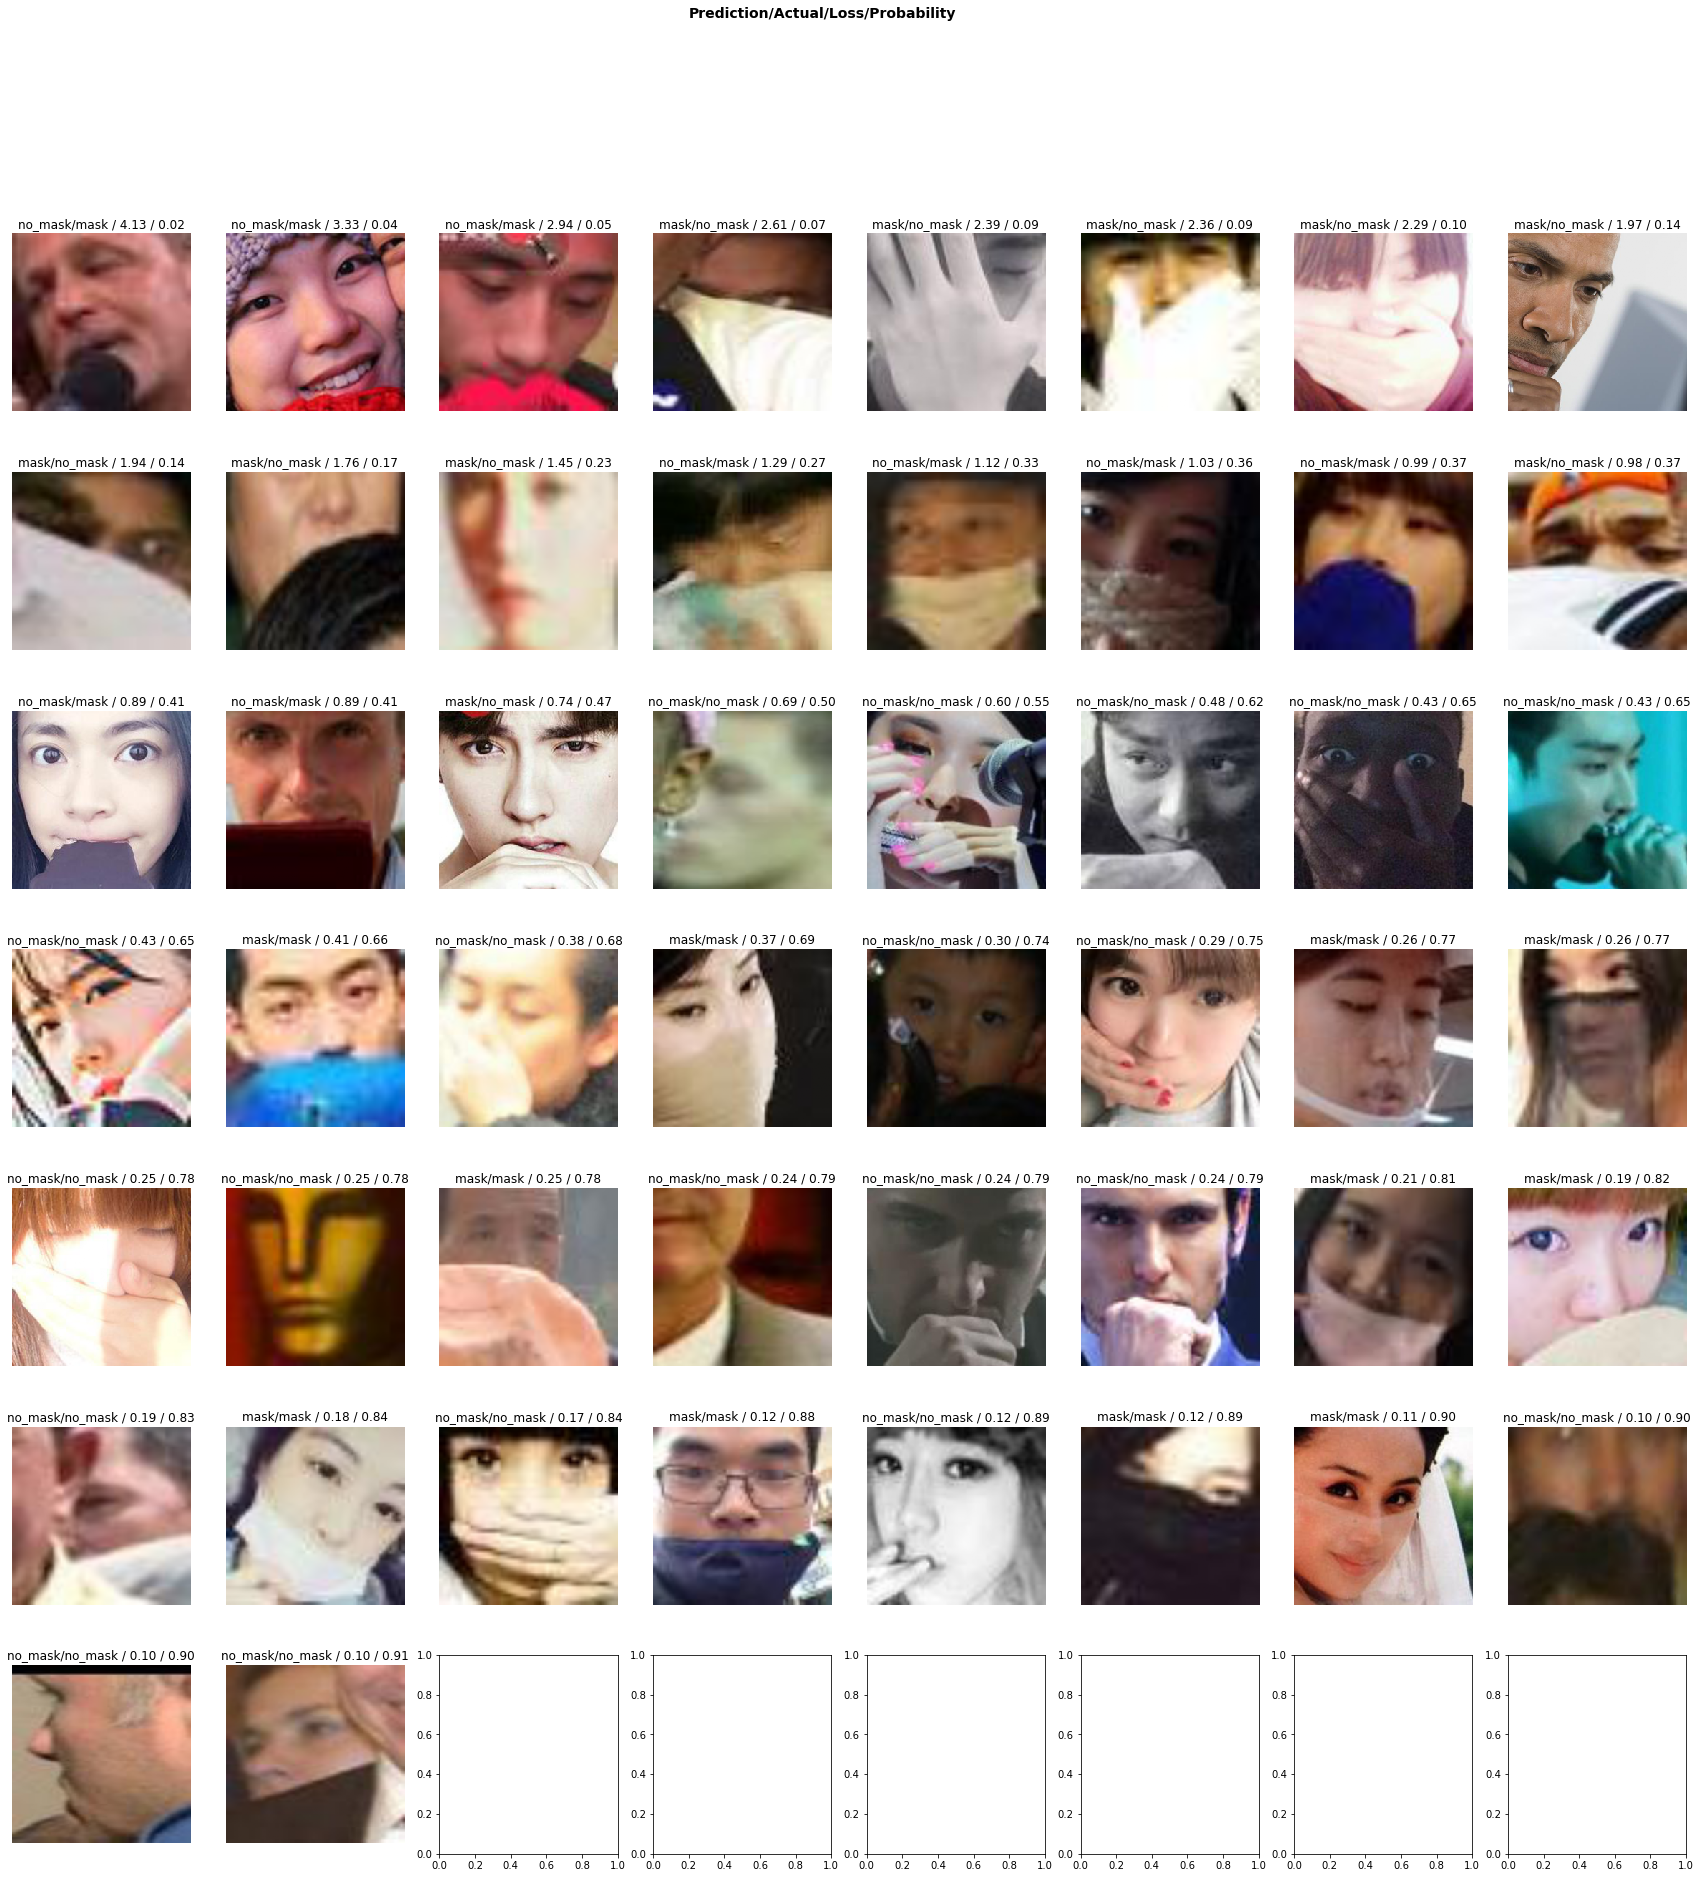

In [34]:
interp.plot_top_losses(50,figsize=(30,30))

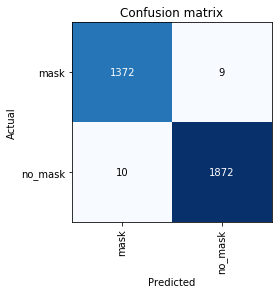

In [35]:
interp.plot_confusion_matrix()

In [36]:
learn.export('model_clean_data.pkl')

In [37]:
learn.model.eval();

In [39]:
learn.model = learn.model.to(torch.device('cpu'))

In [2]:
defaults


namespace(cmap='viridis', cpus=4, device=device(type='cuda'), extra_callback_fns=None, extra_callbacks=None, lr=slice(None, 0.003, None), return_fig=False, silent=False, wd=0.01)

In [3]:
defaults.device = torch.device('cpu')

learn = load_learner(path='.',file='model_clean_data.pkl')

im = open_image('../../../Mask_detection/main_1500.jpg')

In [4]:
%timeit learn.predict(im)

131 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
learn.model.cpu();